In [1]:
import random


#### Reading the file

In [2]:
# reading the file and taking them as list 
with open('BankProblem.txt','r') as BANK:
    probm = BANK.readlines()
    bags = []
    weights = []
    values = []
    for line in probm:
        if "bag" in line:
            bags.append(int(line.split(" ")[2].split(":")[0]))
        if "weight" in line:
            weights.append(float(line.split(" ")[3].replace("\n","")))
        if "value" in line:
            values.append(int(line.split(" ")[3]))
van_capacity = 285
print("Details.")
print("Bags Weight Value ")
for i in bags:
    print("{0}     {1}     {2} \n".format(i,weights[i-1],values[i-1]))

Details.
Bags Weight Value 
1     9.4     57 

2     7.4     94 

3     7.7     59 

4     7.4     83 

5     2.9     82 

6     1.1     91 

7     7.3     42 

8     9.0     84 

9     8.1     85 

10     7.2     18 

11     7.5     94 

12     4.2     18 

13     4.4     31 

14     5.7     27 

15     2.0     31 

16     2.0     42 

17     9.9     58 

18     9.5     57 

19     5.2     55 

20     7.1     97 

21     6.8     79 

22     1.6     10 

23     7.9     34 

24     3.0     100 

25     1.6     98 

26     9.0     45 

27     2.1     19 

28     4.9     77 

29     7.0     56 

30     6.8     25 

31     7.7     60 

32     2.1     22 

33     8.4     84 

34     1.9     89 

35     6.5     12 

36     3.8     46 

37     2.5     20 

38     4.3     85 

39     9.9     42 

40     8.5     94 

41     8.0     20 

42     1.0     65 

43     4.4     27 

44     2.6     34 

45     2.1     27 

46     7.4     91 

47     1.5     17 

48     2.2     56 

49     8.1     23 



#### Initial Population

In [3]:
#Initial Population
# importing numpy and representing the values as 0's and 1's which are randomly choosen
# 1's being considered where as 0's being not considered
import numpy as np
sols = 10 #population size
population_size = (sols , len(bags))
ini_pop = np.random.randint(2, size = population_size)
Initial_Population = ini_pop.astype(int)
#printing the initial population in 0's and 1's
print('Initial population: \n',Initial_Population)

Initial population: 
 [[1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
  1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0
  0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1]
 [1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0
  1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1
  1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1]
 [0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1
  0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
  1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0]
 [1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0
  0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0
  0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0]
 [1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0
  1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1
  

#### Fitness

In [4]:
#Fitness Calculation

def FitNeSS_cal(weight, value, population, capacity):
    FitNeSS_new = np.empty(population.shape[0])
    for i in range(population.shape[0]):
# checking the weight and then considering the value neglect if the weight limit exceeds i.e; weight<285kg
        F1 = np.sum(population[i] * value)
        F2 = np.sum(population[i] * weight)
        if F2 <= capacity:
            FitNeSS_new[i] = F1
        else :
            FitNeSS_new[i] = 0 
    return FitNeSS_new.astype(int)


#### Selection

In [5]:

#Selection

def selection(FitNeSS_new,no_of_Parents, population):
    FitNeSS_new = list(FitNeSS_new)
    L1_FIT = []
    PARENT_1 = np.empty((no_of_Parents, population.shape[1]))
    for i in range(no_of_Parents):
        r = np.random.randint(10) #population size 
        L1_FIT.append(FitNeSS_new[r])
    i = np.sort(L1_FIT)[-1]
    j = FitNeSS_new.index(i)
    PARENT_1 = population[j]
    L2_FIT = []
    PARENT_2 = np.empty((no_of_Parents, population.shape[1]))
    for k in range(no_of_Parents):
        r = np.random.randint(10) # population size
        L2_FIT.append(FitNeSS_new[r])
    k = np.sort(L2_FIT)[-1]
    L = FitNeSS_new.index(k)
    PARENT_2 = population[L]    
    PARENTS=np.vstack((PARENT_1,PARENT_2)).reshape(-1,100)
    return PARENTS


#### Crossover

In [6]:
#Crossover
# randomly splitting the two values 
def crossover(PARENTS, no_of_offsprings):
    k = np.random.randint(0, 100)
    print("Crossover point :", k)
    PARENT_1,PARENT_2=PARENTS[0][:],PARENTS[1][:] #crossover point made randomly
    for i in range(k, 100): #length of parent
        PARENT_1[i], PARENT_2[i] = PARENT_2[i], PARENT_1[i]
    CHILDS = np.vstack((PARENT_1,PARENT_2))
    return CHILDS

#### Mutation

In [7]:

#Mutation
# changing the values 0 to 1 and vice versa
def mutation(CHILDS):
    for i in range(CHILDS.shape[0]):
        random_value = np.random.randint(2)
        index_value = np.random.randint(100)
        CHILDS[0][index_value]=random_value
        random_value1 = np.random.randint(2)
        index_value1 = np.random.randint(100)
        CHILDS[1][index_value1]=random_value1
    return CHILDS


#### Replacement

In [8]:

#Replacement
def replacement(mutants,FitNeSS_new):
    print(mutants)
    print(FitNeSS_new)
    c = 0
    a = FitNeSS_cal(weights, values, mutants, van_capacity)
    b = np.argsort(a)
    print("Mutations fitness")
    print(b)
    init_population = Initial_Population.copy()
    smallest = np.argsort(FitNeSS_new)[0]
    second_small = np.argsort(FitNeSS_new)[1]

    print("Fitness new smallest")
    print(FitNeSS_new[smallest])
# checking whether the child is better than the parent and replacing them in the population
    if(FitNeSS_new[smallest] < a[b[0]]):
        FitNeSS_new[smallest] = a[b[0]]
        init_population[smallest][:] = mutants[0][:]

    if(FitNeSS_new[second_small] < a[b[1]]):
        FitNeSS_new[second_small] = a[b[1]]
        init_population[second_small][:] = mutants[1][:]
    return init_population

max_fitness1 = []


#### Driver code

In [9]:
#driver code
maxxx = []  # collecting all the best values generated in a single trial
for i in range(10000): #fitness evaluation max = 10000

    FitNeSS_new = FitNeSS_cal(weights,values,Initial_Population,van_capacity)
    print("Fitness new")
    print(FitNeSS_new)
    PARENTS_new = selection(FitNeSS_new,5,Initial_Population) # number =tournament size
    childs = crossover(PARENTS_new,2)
    for i in range(2): #mutation rate changing the values from 0 to 1 and vice versa with rate '1' being 1 value from the population gets changed and 2 values get changed for rate '2' and so on. 
        mutations = mutation(childs)
    new_fitness = FitNeSS_cal(weights,values,mutations,van_capacity)
   
    Initial_Population = replacement(mutations,FitNeSS_new)
    max_fitness1.append(max(FitNeSS_new))
    maxxx.append(max(max_fitness1))

Fitness new
[2570    0 2272 2076 2264 2793    0 2697    0 2142]
Crossover point : 65
[[1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0
  1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1
  1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1
  0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1
  0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0]]
[2570    0 2272 2076 2264 2793    0 2697    0 2142]
Mutations fitness
[0 1]
Fitness new smallest
0
Fitness new
[2570 2577 2272 2076 2264 2793 2729 2697    0 2142]
Crossover point : 90
[[1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1
  0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1
  0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0]
 [1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0
  1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Crossover point : 0
[[0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1
  1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0
  1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1]
 [0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1
  1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0
  1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1]]
[4436 4436 4436 4436 4436 4436 4436 4436 4436 4436]
Mutations fitness
[1 0]
Fitness new smallest
4436
Fitness new
[4436 4436 4436 4436 4436 4436 4436 4436 4436 4436]
Crossover point : 61
[[0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1
  1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0
  1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1]
 [0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1
  1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0
  1 1 0 1 1 1 0 1 0 0 1

In [10]:
maximum_among_all = max(max_fitness1)
print(maximum_among_all)

4436


In [11]:
import matplotlib.pyplot as plt
print(maxxx)


[2793, 2793, 2993, 2993, 2993, 3114, 3114, 3131, 3131, 3136, 3173, 3173, 3173, 3187, 3289, 3289, 3327, 3327, 3327, 3327, 3327, 3327, 3327, 3327, 3327, 3327, 3359, 3359, 3359, 3359, 3359, 3369, 3369, 3369, 3377, 3411, 3411, 3411, 3411, 3411, 3411, 3411, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3455, 3463, 3480, 3480, 3480, 3480, 3480, 3480, 3480, 3480, 3480, 3480, 3480, 3480, 3480, 3480, 3497, 3537, 3537, 3537, 3537, 3567, 3567, 3567, 3567, 3567, 3567, 3567, 3589, 3589, 3655, 3655, 3655, 3655, 3655, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3660, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3706, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 3771, 377

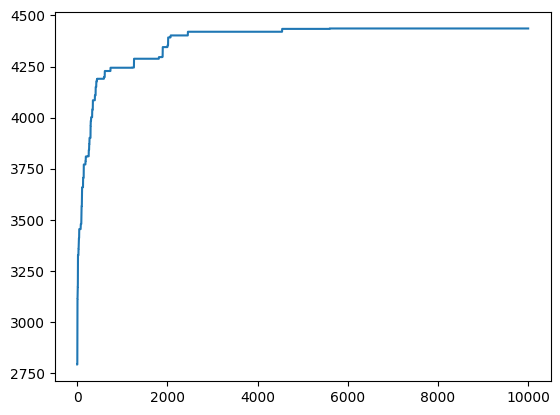

In [12]:
plt.plot(maxxx)
